In [45]:
import numpy as np

class LogisticRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept = None
        self._theta = None

    def _sigmoid(self, t):
        return 1. / (1. + np.exp(-t))

    def fit(self, X_train, y_train, eta = 0.01, n_iters = 1e4):
        """根据训练数据集X_train, y_train，使用梯度下降法训练Logistic Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], "Error!"

        def J(theta, X_b, y):
            y_hat = self._sigmoid(X_b.dot(theta))
            try:
                return -np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) / len(y)
            except:
                return float('inf')

        def dJ(theta, X_b, y):
            return X_b.T.dot(self._sigmoid(X_b.dot(theta)) - y) / len(y)

        def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon = 1e-8):
            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break
                    
                cur_iter += 1

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

        self.intercept = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def predict_proba(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果概率向量"""
        assert self.intercept is not None and self.coef_ is not None, "Error!"
        assert X_predict.shape[1] == len(self.coef_), "Error!"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self._sigmoid(X_b.dot(self._theta))

    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.intercept is not None and self.coef_ is not None, "Error!"
        assert X_predict.shape[1] == len(self.coef_), "Error!"

        proba = self.predict_proba(X_predict)
        return np.array(proba >= 0.5, dtype = 'int')

    def score(self, X_test, y_test):
        """根据测试数据集X_test和y_test确定当前模型的准确度"""
        y_predict = self.predict(X_test)
        return np.sum(y_test == y_predict) / len(y_test)

    def __repr__(self):
        return "LogisticRegression()"

In [30]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

In [31]:
X = iris.data
y = iris.target

In [32]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
len(X), len(y)

(150, 150)

In [35]:
X = X[y < 2, :2]
y = y[y < 2]

In [36]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [37]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

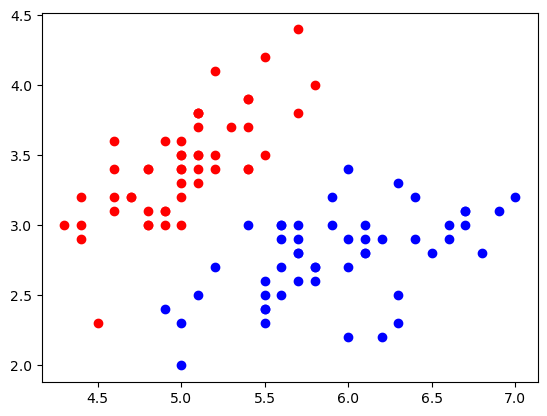

In [38]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = "red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = "blue")
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [40]:
X_train, X_test, y_train, y_test

(array([[5.1, 3.7],
        [4.7, 3.2],
        [4.4, 2.9],
        [4.5, 2.3],
        [5.7, 2.9],
        [6.4, 2.9],
        [6. , 2.9],
        [5. , 3.4],
        [5.5, 2.4],
        [5.1, 3.3],
        [6.6, 3. ],
        [5.8, 2.7],
        [7. , 3.2],
        [5.5, 2.4],
        [4.9, 3.1],
        [5.1, 3.8],
        [5.5, 2.6],
        [6.2, 2.2],
        [5.7, 3. ],
        [6.5, 2.8],
        [5.7, 4.4],
        [5. , 3.3],
        [4.6, 3.6],
        [4.9, 3.1],
        [4.9, 2.4],
        [5.7, 2.8],
        [5.1, 3.8],
        [5.6, 3. ],
        [6.6, 2.9],
        [5.7, 2.8],
        [4.4, 3. ],
        [6.3, 2.3],
        [5.2, 3.5],
        [5.5, 2.5],
        [5. , 2.3],
        [5.1, 3.5],
        [5.5, 4.2],
        [5.1, 2.5],
        [6. , 2.7],
        [4.4, 3.2],
        [5.4, 3.9],
        [5. , 3.4],
        [6.1, 2.8],
        [6. , 3.4],
        [4.6, 3.2],
        [5.4, 3. ],
        [5.6, 2.7],
        [5.3, 3.7],
        [5.8, 2.6],
        [6.7, 3. ],


In [47]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [48]:
log_reg.intercept, log_reg.coef_

(-0.6827383698993109, array([ 3.01749692, -5.03046934]))

In [49]:
log_reg.score(X_test, y_test)

1.0

In [50]:
log_reg.predict_proba(X_test)

array([0.93292947, 0.98717455, 0.15541379, 0.01786837, 0.03909442,
       0.01972689, 0.05214631, 0.99683149, 0.98092348, 0.75469962,
       0.0473811 , 0.00362352, 0.27122595, 0.03909442, 0.84902103,
       0.80627393, 0.83574223, 0.33477608, 0.06921637, 0.21582553,
       0.0240109 , 0.1836441 , 0.98092348, 0.98947619, 0.08342411])

In [51]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

In [52]:
log_reg._theta

array([-0.68273837,  3.01749692, -5.03046934])